In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
data_path = '../datasets/cleaned_data.csv'
data = pd.read_csv(data_path )
data.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kid
0,Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,88,...,7,0,0,0,0,0,0,1,66,0
1,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,1,...,5,0,0,0,0,0,0,0,69,2
2,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,21,...,4,0,0,0,0,0,0,0,58,0
3,Graduation,Together,26646.0,2014-02-10,26,11,4,20,10,3,...,6,0,0,0,0,0,0,0,39,1
4,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,27,...,5,0,0,0,0,0,0,0,42,1


In [4]:

categorical_columns = ['Education', 'Marital_Status']
cat_distribution = data[categorical_columns].apply(lambda x: x.value_counts())
cat_distribution

,Education,Marital_Status
2n Cycle,200.0,NaN
Absurd,NaN,2.0
Alone,NaN,3.0
Basic,54.0,NaN
Divorced,NaN,232.0
Graduation,1116.0,NaN
Married,NaN,857.0
Master,365.0,NaN
PhD,481.0,NaN
Single,NaN,471.0


In [5]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, "Distribution de l'âge")

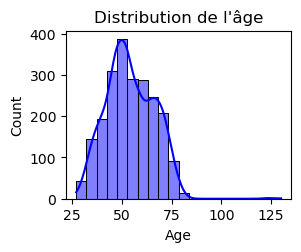

In [6]:
# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution de l\'âge')

Text(0.5, 1.0, 'Distribution des revenus')

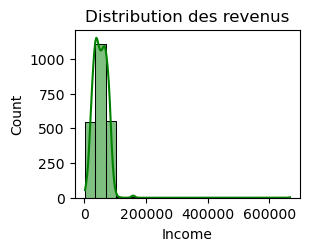

In [7]:
# Income distribution
plt.subplot(2, 2, 2)
sns.histplot(data['Income'], bins=20, kde=True, color='green')
plt.title('Distribution des revenus')

Text(0.5, 1.0, 'Distribution des achats de vin')

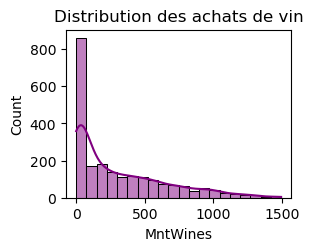

In [8]:
# Montant dépensé en vin
plt.subplot(2, 2, 4)
sns.histplot(data['MntWines'], bins=20, kde=True, color='purple')
plt.title('Distribution des achats de vin')


Text(0.5, 1.0, 'Distribution de la récence')

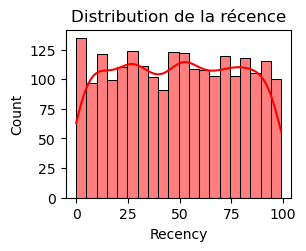

In [9]:
# Recency distribution
plt.subplot(2, 2, 3)
sns.histplot(data['Recency'], bins=20, kde=True, color='red')
plt.title('Distribution de la récence')

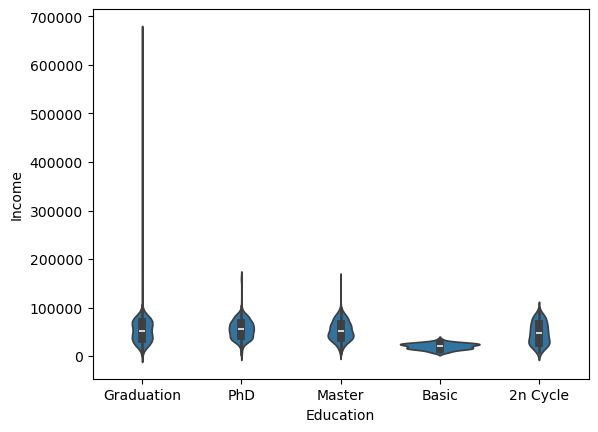

In [13]:
sns.violinplot(x="Education", y="Income", data=data)
plt.show()

In [15]:
# 1. Boxplots pour examiner les revenus et dépenses par statut marital
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Single'),
  Text(1, 0, 'Together'),
  Text(2, 0, 'Married'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widow'),
  Text(5, 0, 'Alone'),
  Text(6, 0, 'Absurd'),
  Text(7, 0, 'YOLO')])

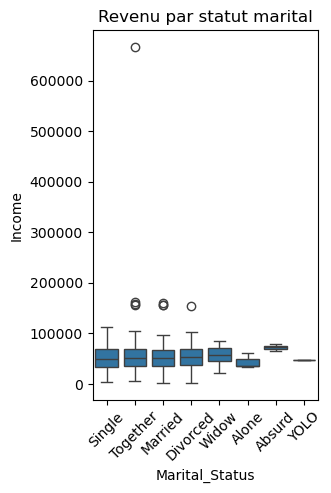

In [16]:
# Boxplot des revenus par statut marital
plt.subplot(1, 2, 1)
sns.boxplot(x='Marital_Status', y='Income', data=data)
plt.title('Revenu par statut marital')
plt.xticks(rotation=45)


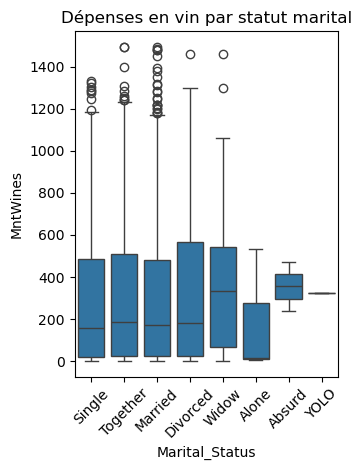

In [18]:
#dépenses en vin par statut marital
plt.subplot(1, 2, 2)
sns.boxplot(x='Marital_Status', y='MntWines', data=data)
plt.title('Dépenses en vin par statut marital')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Espri\AppData\Local\Temp\ipykernel_18964\2215807080.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Education', data=data, order=data['Education'].value_counts().index, palette='viridis')


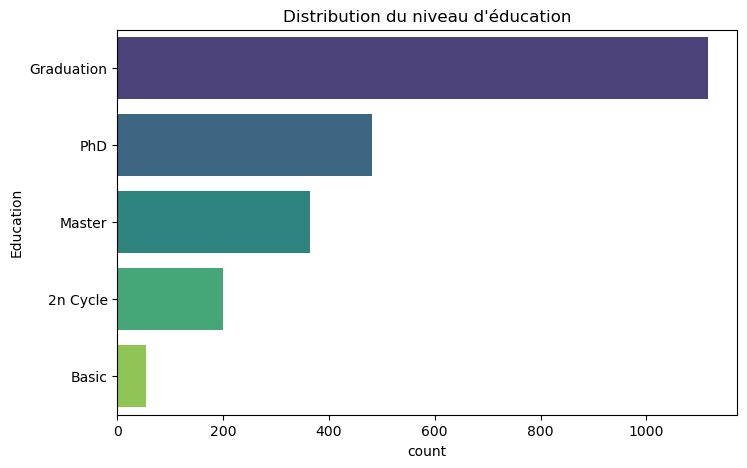

In [20]:
# visualiser la distribution de l'éducation
plt.figure(figsize=(8, 5))
sns.countplot(y='Education', data=data, order=data['Education'].value_counts().index, palette='viridis')
plt.title('Distribution du niveau d\'éducation')
plt.show()


In [21]:
#  examiner les distributions de dépenses par niveau d'éducation
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

C:\Users\Espri\AppData\Local\Temp\ipykernel_18964\1751643383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Education', y='MntWines', data=data, palette='muted')


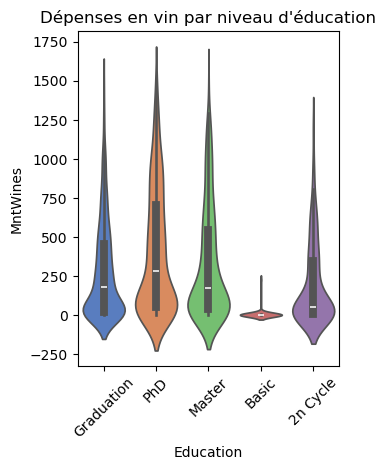

In [26]:
#  dépenses en vin par niveau d'éducation
plt.subplot(1, 2, 1)
sns.violinplot(x='Education', y='MntWines', data=data, palette='muted')
plt.title('Dépenses en vin par niveau d\'éducation')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


C:\Users\Espri\AppData\Local\Temp\ipykernel_18964\677326814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Education', y='MntMeatProducts', data=data, palette='muted')


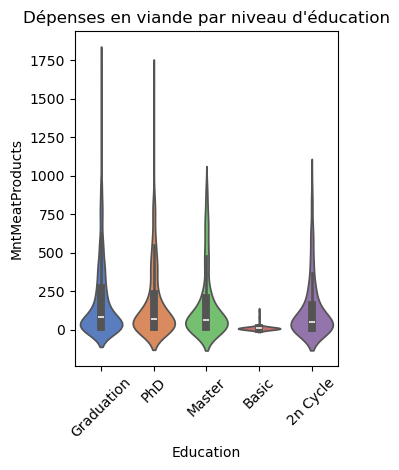

In [25]:
# Violin plot des dépenses en viande par niveau d'éducation
plt.subplot(1, 2, 2)
sns.violinplot(x='Education', y='MntMeatProducts', data=data, palette='muted')
plt.title('Dépenses en viande par niveau d\'éducation')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


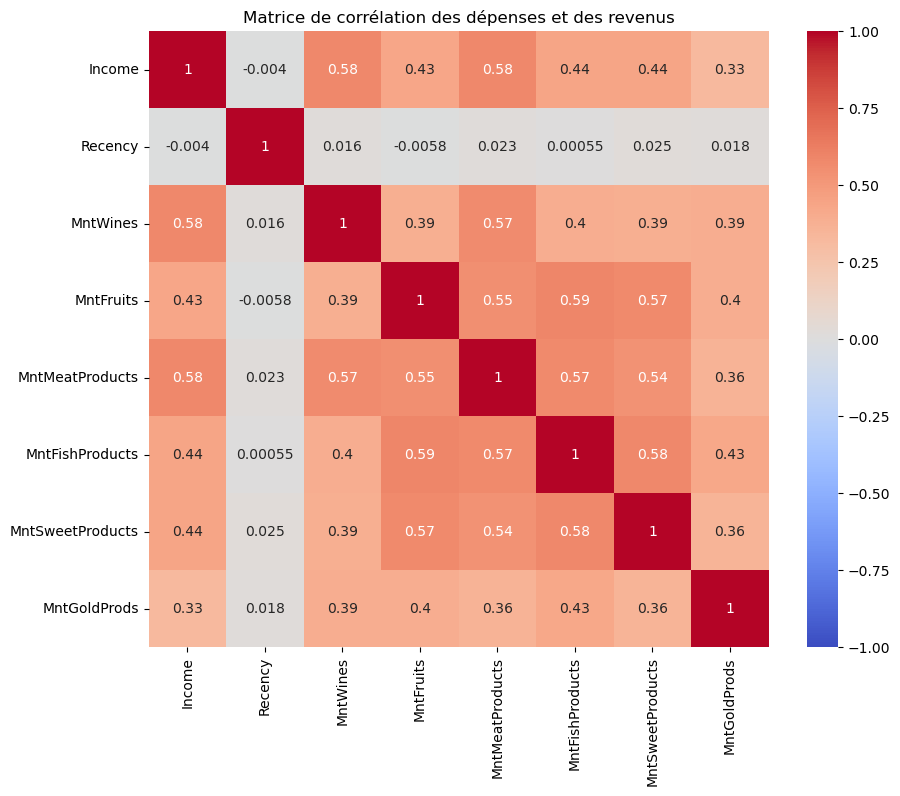

In [10]:
# Matrice de corrélation
correlation_matrix = data[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation des dépenses et des revenus')
plt.show()